<div align="center"> 

# Investigating Oil prices and Big Tech. Companies Stock Market 

<p>Between 2001-1-1 - 2023-12-31</p>
</div>

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

## **1.** Problem Statement

In this reserach, the stock prices of major tech companies (such as Apple, Microsoft, Google, Amazon, and META) and oil prices over the period spanning from January 2001 to December 2023 are investigated. By examining historical data for both sectors, the aim is to uncover insights into how changes in oil prices impact the financial performance of big tech companies, and vice versa.
The datasets would include the stock market data for:
- META
- AMazon
- Google
- Apple

## **2.** Solution Pipeline
1. Gather Data
2. Asses Data
3. Clean Data
4. Store Data
5. Answering Research Questions

### Neccessary Imports

In [1]:
## Run this cell to successfully run this notebook
## !pip install yfinance

In [2]:
import requests
import pandas as pd
import yfinance as yf
import requests
import config
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Gather data

In this section, data using two different (data gathering methods) are extractand and then combined. Two different types of data-gathering methods are use:
- Programmatically downloading files
- Gathering data by accessing APIs

### **3.1.** Gathering Data Methods and Code

In this project, two types of data gathering are use: 
- Programmatically downloading files
- Gathering data by accessing APIs

Each of the datasets have at least two variables, and have greater than 500 data samples within.

#### **Dataset 1**: Oils and Petroleum dataset 

##### *About this dataset*

**Type:** JSON response

**Method:** The data was gathered using the "by accessing APIs" method from https://api.eia.gov/v2/petroleum/pri/spt/data/

**Dataset variables:**

| Column Name | Description |
|---|---|
| period |  date associated with the data point |
| duoarea | identifier for a specific geographical area |
| area-name | area name |
| product | identifier for the specific petroleum product |
| product-name | name of the product |
| process | identifier for the specific process |
| process-name | The name of the process used |
| series | identifier for the specific data series |
| series-description | descriptive text name or label for the data |

##### *Gathering by API*

In [3]:
## Gather the data using the "Gather data by accessing APIs" method from https://api.eia.gov
api_key = config.EIA_API_KEY
url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?'

params = {
    'api_key':api_key,
    'start':'2005-01-01', 
    'end':'2023-12-31'
}

response = requests.get(url, params=params)
data = response.json()
oil_data =pd.DataFrame(data['response']['data'])
oil_data.sample(5)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description
1194,2012-04-06,Y05LA,LOS ANGELES,EPD2DC,Carb Diesel,PF4,Spot Price FOB,EER_EPD2DC_PF4_Y05LA_DPG,"Los Angeles, CA Ultra-Low Sulfur CARB Diesel S..."
343,2005-05-27,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel)
4516,2009-12-11,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,PF4,Spot Price FOB,EER_EPMRR_PF4_Y05LA_DPG,Los Angeles Reformulated RBOB Regular Gasoline...
1944,2013-06-21,RGC,NA,EPD2DXL0,No 2 Diesel Low Sulfur (0-15 ppm),PF4,Spot Price FOB,EER_EPD2DXL0_PF4_RGC_DPG,U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel S...
2870,2023-06-23,RGC,NA,EPJK,Kerosene-Type Jet Fuel,PF4,Spot Price FOB,EER_EPJK_PF4_RGC_DPG,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...


In [4]:
oil_data.shape

(5000, 9)

> The gathered dataset have 5000 rows and 9 features.

In [5]:
oil_data.to_csv('data/oil_data_api.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

#### **Dataset 2**: Stocks Dataset

##### *About this dataset*
**Type:** Pandas.DataFrame

**Method:** The data was gathered using the "Programmatically downloading files" method from Yahoo Finance using the yfinance library

**Dataset variables:**

| Column Name | Description |
|---|---|
| Date | date associated with the data point |
| Open | The opening price of the stock on that date. |
| High | The highest price reached by the stock on that date. |
| Low | The lowest price reached by the stock on that date. |
| Close | The closing price of the stock on that date. |
| Adj Close | The adjusted closing price, adjusted for dividends and splits. |
| Volume | The number of shares traded on that date. |

##### *Gathering by Programmatically Downloading*

In [49]:
## 2nd data gathering was downloaded programitticallly from Yahoo Finance using the yfinance library
companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
stocks_data = yf.download(companies, start='2005-01-01', end='2023-12-31')
stocks_data.reset_index(inplace=True)
stocks_data.sample(5)

[*********************100%%**********************]  5 of 5 completed


Price        Date  Adj Close                                                \
Ticker                  AAPL       AMZN      GOOGL        META        MSFT   
2837   2016-04-12  25.205942  30.158501  38.172188  110.383171   48.736088   
3186   2017-08-29  38.273735  47.702999  46.733864  167.705383   67.599754   
353    2006-05-30   1.848523   1.732000   9.297137         NaN   16.442261   
1720   2011-10-31  12.222225  10.675500  14.813828         NaN   20.932016   
3666   2019-07-29  50.590389  95.622498  62.020817  195.538177  134.499695   

Price       Close                                    ...       Open           \
Ticker       AAPL       AMZN      GOOGL        META  ...       AAPL     AMZN   
2837    27.610001  30.158501  38.216000  110.610001  ...  27.334999  29.9200   
3186    40.727501  47.702999  46.787498  168.050003  ...  40.025002  47.0000   
353      2.186429   1.732000   9.307808         NaN  ...   2.260357   1.7865   
1720    14.456429  10.675500  14.830831         NaN  ...  14.372143  10.7895   
3666    52.419998  95.622498  62.091999  195.940002  ...  52.115002  96.5000   

Price                                         Volume                        \
Ticker      GOOGL        META        MSFT       AAPL       AMZN      GOOGL   
2837    37.921501  109.339996   54.369999  108929200   52822000   27388000   
3186    45.997501  165.250000   72.250000  118067600   57486000   23172000   
353      9.466466         NaN   23.549999  563402000  118416000  172467360   
1720    14.892142         NaN   26.760000  385501200  146866000  102209688   
3666    62.125000  199.000000  141.500000   86693600   89864000   41382000   

Price                         
Ticker        META      MSFT  
2837    26248100.0  24944300  
3186    11121000.0  11478400  
353            NaN  52497500  
1720           NaN  46799000  
3666    16530800.0  16605900  

[5 rows x 31 columns]

In [50]:
stocks_data.shape

(4781, 31)

> The gathered data has 5785 data points and 31 features.

In [51]:
stocks_data.to_csv('data/stock_data.csv', index=False) ## store to cvs file

> Storing step: the dataset is saved to the local data store directory before moving to the next step.

## 4. Assess data
Now that we have gathered the datasets, let's assess the dataset for data quality and structural issues. In this section, the data is assessed according to data quality and tidiness metrics. Where two data quality issues and two tidiness issues are assessed. Each are assess visually and programmatically, then the issue is described. Justifications for the methods used for the assessment are also included.
Issues assessed:
- Completness
- Validity
- Columns Names
- Inexing of the data

### **Completeness (Quality Issue #1):**
This is the issue of having missing data in the datsets. It affects good analysis and will be assessed for both datasets programmatically and visualy.

#### **Stocks Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

In [76]:
nan = ['NA','NaN','-', '0',0, np.nan] ## possible null vlaues

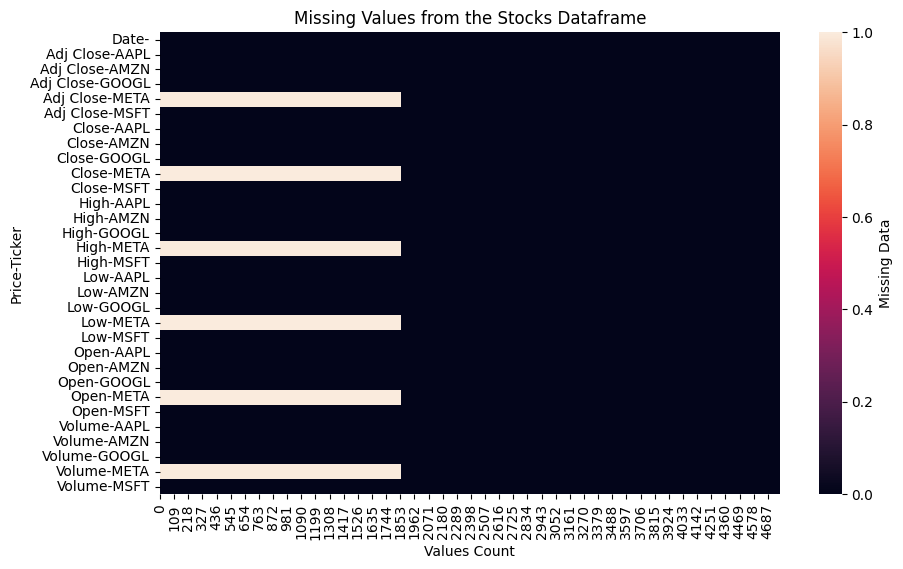

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(stocks_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Stocks Dataframe')
plt.xlabel('Values Count');

> Almost half of the data from the META company are missing. The other missing values are from Google company.

##### Inspecting the dataframe programmatically
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos.

In [54]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            4781 non-null   datetime64[ns]
 1   (Adj Close, AAPL)   4781 non-null   float64       
 2   (Adj Close, AMZN)   4781 non-null   float64       
 3   (Adj Close, GOOGL)  4781 non-null   float64       
 4   (Adj Close, META)   2923 non-null   float64       
 5   (Adj Close, MSFT)   4781 non-null   float64       
 6   (Close, AAPL)       4781 non-null   float64       
 7   (Close, AMZN)       4781 non-null   float64       
 8   (Close, GOOGL)      4781 non-null   float64       
 9   (Close, META)       2923 non-null   float64       
 10  (Close, MSFT)       4781 non-null   float64       
 11  (High, AAPL)        4781 non-null   float64       
 12  (High, AMZN)        4781 non-null   float64       
 13  (High, GOOGL)       4781 non-null   float64     

> While the range index is from 0 to 4781, some the columns arn't complete such as (Adj Close, GOOGL), (Adj Close, META), (Close, GOOGL), (Close, META),  (High, GOOGL), (High, META),  (Low, GOOGL),  (Low, META), (Open, GOOGL),  (Open, META),  (Volume, GOOGL), (Volume, META) and (Volume, MSFT).
> These missing data are specifically in data regarding the Google, and the META big tech companies.

In [12]:
stocks_data.isna().sum().sort_values(ascending=False) 

Price      Ticker
Open       META      1858
Volume     META      1858
Low        META      1858
Adj Close  META      1858
High       META      1858
Close      META      1858
Open       GOOGL        0
Low        MSFT         0
Open       AAPL         0
           AMZN         0
Date                    0
Low        AMZN         0
Open       MSFT         0
Volume     AAPL         0
           AMZN         0
           GOOGL        0
Low        GOOGL        0
High       MSFT         0
Low        AAPL         0
Adj Close  AAPL         0
High       GOOGL        0
           AMZN         0
           AAPL         0
Close      MSFT         0
           GOOGL        0
           AMZN         0
           AAPL         0
Adj Close  MSFT         0
           GOOGL        0
           AMZN         0
Volume     MSFT         0
dtype: int64

> There are 1858 missing records from the META Datasets.

#### **Oil Dataset**

##### *Inspecting the dataframe visually*
To inspcet the data qaulity issue of completeness, let's visualize the ddata frame into a heatmap. It will be showing the missing data with a diffrent color.

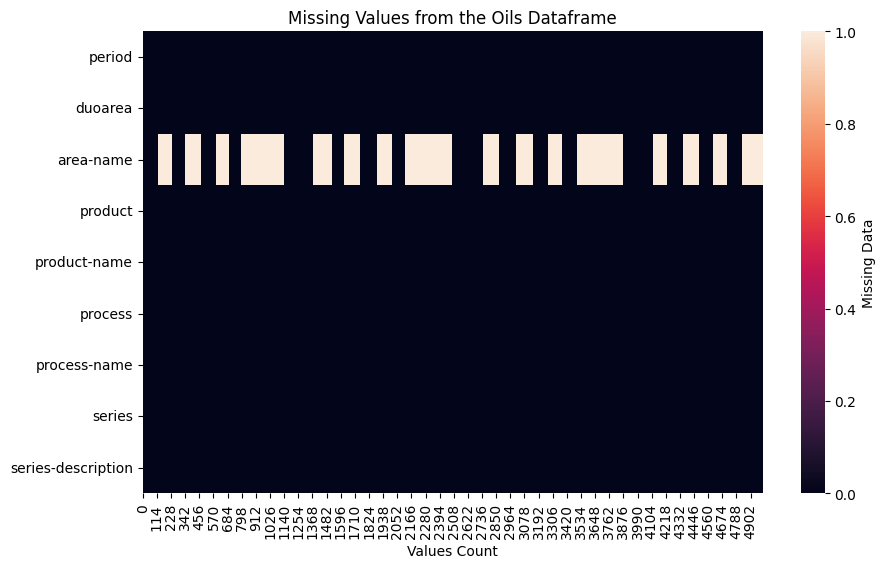

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(oil_data.isin(nan).transpose(), cbar_kws={'label': 'Missing Data'}) ## visualize the missing data transposed
plt.title('Missing Values from the Oils Dataframe')
plt.xlabel('Values Count');

> The only column that has missing values in the oils dataframe is the area-name. It seems to have missing values alongside diffrent dates.

##### *Inspecting the dataframe programmatically*
To inspect for missing values programmatically the `.info()` is used alongside checking the `.isna()` methos. However, some missing values wesn't detected using these methods so there had to use the `.isin()` method to check if there are missing values programmatically.

In [56]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              5000 non-null   object
 1   duoarea             5000 non-null   object
 2   area-name           5000 non-null   object
 3   product             5000 non-null   object
 4   product-name        5000 non-null   object
 5   process             5000 non-null   object
 6   process-name        5000 non-null   object
 7   series              5000 non-null   object
 8   series-description  5000 non-null   object
dtypes: object(9)
memory usage: 351.7+ KB


> The data have 0 to 4999 indices, and all the columns non-null counts are full. 

In [60]:
oil_data.sample(5) ## take a sample of 5

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description
3201,2012-03-23,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,PF4,Spot Price FOB,EER_EPMRR_PF4_Y05LA_DPG,Los Angeles Reformulated RBOB Regular Gasoline...
4138,2007-07-06,RGC,NA,EPJK,Kerosene-Type Jet Fuel,PF4,Spot Price FOB,EER_EPJK_PF4_RGC_DPG,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...
4561,2018-04-13,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,PF4,Spot Price FOB,EER_EPMRR_PF4_Y05LA_DPG,Los Angeles Reformulated RBOB Regular Gasoline...
524,2014-08-29,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,PF4,Spot Price FOB,EER_EPMRR_PF4_Y05LA_DPG,Los Angeles Reformulated RBOB Regular Gasoline...
1756,2005-03-04,Y05LA,LOS ANGELES,EPMRR,Reformulated Regular Gasoline,PF4,Spot Price FOB,EER_EPMRR_PF4_Y05LA_DPG,Los Angeles Reformulated RBOB Regular Gasoline...


> However with further looking, it was noticed that there are NA values used to presnet the null values.

In [61]:
oil_data.isin(nan).sum() ## to check if some values are not detected using isna

period                   0
duoarea                  0
area-name             2743
product                  0
product-name             0
process                  0
process-name             0
series                   0
series-description       0
dtype: int64

> In the oil dataset there appears to be 2743 NA values from the area-name column. The other columns doesn't have NA values. However, the duoarea have no missing values.

### **Validity (Quality Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the dataset using the `.datatype` attribute of the datasets.

In [62]:
stocks_data.dtypes ## looking into datatypes

Price      Ticker
Date                 datetime64[ns]
Adj Close  AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Close      AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
High       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Low        AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Open       AAPL             float64
           AMZN             float64
           GOOGL            float64
           META             float64
           MSFT             float64
Volume     AAPL               int64
          

> The datastypes are all valid. Let's take a look into why For the volume some of the columns have integer values.

In [63]:
stocks_data['Date'].sample(5) ## Take a sample of 5

1975   2012-11-06
4720   2023-10-04
3836   2020-03-31
1494   2010-12-08
2099   2013-05-07
Name: Date, dtype: datetime64[ns]

> The datetime64 is actuualy only the date of the record there is no timestamps. The decsision will be to extract teh months, years and days after the merge. To make more sense when visualization and answering the reswarch question.

In [64]:
int_col= list(stocks_data.dtypes[stocks_data.dtypes == 'int64']['Volume'].index) ## take the values where the datatypes are integers
for col in int_col:
    print(stocks_data['Volume',col].sample(5))

2092    764097600
618     943026000
1251    611906400
2456    148204800
2600    203953200
Name: (Volume, AAPL), dtype: int64
4309     83230000
2578     49162000
3673     90538000
1305    144816000
317     185892000
Name: (Volume, AMZN), dtype: int64
315     627999372
657     145202652
2375     22580000
208     235903860
3298     66792000
Name: (Volume, GOOGL), dtype: int64
557     47934900
861     76063400
3891    23061600
1716    53554600
575     41778400
Name: (Volume, MSFT), dtype: int64


> The dataset is valid in terms of data types for the integers columns.

##### *Inspecting the dataframe visually*
The visualization used to check for datatypes validity is a summary statics table.

In [65]:
## Inspecting the dataframe visually
stocks_data.describe().T

count                           mean                  min  \
Price     Ticker                                                               
Date                4781  2014-07-01 15:02:04.241790208  2005-01-03 00:00:00   
Adj Close AAPL    4781.0                      43.406251             0.955513   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.617377             4.374109   
          META    2923.0                     157.370234             17.69364   
          MSFT    4781.0                      85.750155            11.263437   
Close     AAPL    4781.0                      45.151456             1.130179   
          AMZN    4781.0                      47.456018               1.3035   
          GOOGL   4781.0                      42.666289             4.379129   
          META    2923.0                      157.69362                17.73   
          MSFT    4781.0                      91.896614                15.15   
High      AAPL    4781.0                      45.611048             1.159107   
          AMZN    4781.0                       48.02516                1.315   
          GOOGL   4781.0                      43.102564             4.464464   
          META    2923.0                     159.668765                18.27   
          MSFT    4781.0                      92.781004                15.62   
Low       AAPL    4781.0                      44.649769             1.117857   
          AMZN    4781.0                      46.862393                1.288   
          GOOGL   4781.0                      42.210375             4.318569   
          META    2923.0                     155.638686            17.549999   
          MSFT    4781.0                      90.932192                14.87   
Open      AAPL    4781.0                      45.120857             1.139107   
          AMZN    4781.0                      47.467806               1.3045   
          GOOGL   4781.0                      42.655534             4.386887   
          META    2923.0                      157.61935                18.08   
          MSFT    4781.0                      91.865313                 15.2   
Volume    AAPL    4781.0               403190325.831416           24048300.0   
          AMZN    4781.0               108328400.397406           17626000.0   
          GOOGL   4781.0               115393301.946873            9312000.0   
          META    2923.0                30604724.769073            5467500.0   
          MSFT    4781.0                45513886.467266            7425600.0   

                                  25%                  50%  \
Price     Ticker                                             
Date              2009-10-01 00:00:00  2014-07-02 00:00:00   
Adj Close AAPL               5.748777            20.945795   
          AMZN                 4.7205              16.6425   
          GOOGL             13.190316            27.369587   
          META              80.604355           153.205185   
          MSFT              20.658804            35.504238   
Close     AAPL               6.799643            23.620001   
          AMZN                 4.7205              16.6425   
          GOOGL             13.205455            27.400999   
          META              80.769997           153.520004   
          MSFT              27.690001            41.459999   
High      AAPL               6.881429            23.887501   
          AMZN                 4.7925               16.829   
          GOOGL             13.343343            27.627001   
          META              81.470001           155.589996   
          MSFT                  27.93                41.66   
Low       AAPL               6.738571            23.407499   
          AMZN                 4.6535               16.441   
          GOOGL             13.075075               27.222   
          META              80.154999           151.660004   
          MSFT

> As noticed in the Date columns there is no need for the timestamped column datatype.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the validity of the dataframe programmatically, let's take a look into the datatypes of the datasets using the `.datatype` attribute of the datasets.

In [66]:
oil_data.dtypes

period                object
duoarea               object
area-name             object
product               object
product-name          object
process               object
process-name          object
series                object
series-description    object
dtype: object

> All the datatypes in oil data are seen as objects. But as seen in the sample of the data some are dates and bumers.

In [67]:
oil_data.sample(2).T

,2014,1381
period,2007-05-25,2006-06-16
duoarea,Y35NY,RGC
area-name,NEW YORK CITY,NA
product,EPD2DXL0,EPJK
product-name,No 2 Diesel Low Sulfur (0-15 ppm),Kerosene-Type Jet Fuel
process,PF4,PF4
process-name,Spot Price FOB,Spot Price FOB
series,EER_EPD2DXL0_PF4_Y35NY_DPG,EER_EPJK_PF4_RGC_DPG
series-description,New York Harbor Ultra-Low Sulfur No 2 Diesel S...,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Pr...


> So most of the data here are categorical.

In [68]:
oil_data.nunique()

period                990
duoarea                 6
area-name               3
product                 9
product-name            9
process                 1
process-name            1
series                 11
series-description     11
dtype: int64

> The date column is named period instead of date. Each of the process and the process-name have only one unique value that is, they don't bring a value to the dataset.

##### *Inspecting the dataframe visually*
The inspecting visually is using the summary statistics table.

In [69]:
oil_data.describe().T

,count,unique,top,freq
period,5000,990,2008-07-25,10
duoarea,5000,6,Y35NY,1405
area-name,5000,3,NA,2743
product,5000,9,EPD2DXL0,892
product-name,5000,9,No 2 Diesel Low Sulfur (0-15 ppm),892
process,5000,1,PF4,5000
process-name,5000,1,Spot Price FOB,5000
series,5000,11,RBRTE,530
series-description,5000,11,Europe Brent Spot Price FOB (Dollars per Barrel),530


> Note that we have only one unique value for both of the process name and the process columns, they don't bring a value to the dataset.

### **Columns Names: (Tidiness Issue #1):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [70]:
stocks_data.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> The columns names have to converted to the appropriate and by the convintion naming of columns.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
The method used to inspect the dataframe programmatically, is calling the `.columns` attribute to look into the names of the columns.

In [71]:
oil_data.columns

Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description'],
      dtype='object')

> The names of these columns would be better mapped for the merging, the column of date is named period. other coulmns could use a more meaningful name and using the convention of columns naming.

### **Indexing (Tidiness Issue #2):**

#### **Stocks Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [72]:
print(stocks_data.index)
stocks_data.columns

RangeIndex(start=0, stop=4781, step=1)


MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', 'GOOGL'),
            (     'Open',  'META'),
            (     'Open',  'MSFT'),
            (   'Volume',  'AAPL'),
            (   'Volume',  '

> This dataset is multi-indexed. It would be difficult to deal with. Since we have to have one observation per row, let's better take the decision to handle this case into one observation per row.

#### **Oil Dataset**

##### *Inspecting the dataframe programmatically*
To inspect the dataframe programmatically in terms of indexing two atttributes are called `.index` and `.columns` it is because they can show the columns and the indecies used in the dataframe.

In [73]:
print(oil_data.index)
oil_data.columns

RangeIndex(start=0, stop=5000, step=1)


Index(['period', 'duoarea', 'area-name', 'product', 'product-name', 'process',
       'process-name', 'series', 'series-description'],
      dtype='object')

> The index of the second dataset is a range index starting from 0 to 5000.

## 5. Clean data
It's time to address the issues found during assessment to clean and polish your data.

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [74]:
## Making copies of the datasets to ensure the raw dataframes are not impacted
oil_data_cleaned = oil_data.copy()
stocks_data_cleaned =stocks_data.copy()

### **Completeness (Quality Issue #1):**

There was missing values in both of the datasets.

#### **Stocks Dataset**
For the stocks datsaets, the method chosen for handling missing values is to use the fillin method using the backward startegy since as shown in the heatmap for misisng values it(missing values) starts from the first index. 

> Justification: *For the META facebook before, there seems to be missing values for some reason, however it was checked if the stock nasdaq name used to be FB so did that affect the way the data was gathered and it turned out to not. FB was created in 2005 and it's supposed to have these stocks too,*

In [129]:
## apply the fill in backward way for META
stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB
stocks_data_cleaned.sample(5)

C:\Users\SS\AppData\Local\Temp\ipykernel_17492\3280220914.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data_cleaned.fillna(method='bfill', inplace=True) ## fillna with backward fill for META FB


Price        Date   Adj Close                                                  \
Ticker                   AAPL        AMZN       GOOGL        META        MSFT   
4139   2021-06-14  128.287369  169.193497  122.305138  336.079346  253.335358   
4758   2023-11-28  189.899765  147.029999  137.042709  338.294800  381.305817   
2893   2016-06-30   21.951824   35.780998   35.136173  114.045647   45.951843   
4681   2023-08-09  177.248672  137.850006  129.511368  304.584076  319.728912   
2030   2013-01-28   13.703119   13.802000   18.765499   32.403412   22.728437   

Price        Close                                      ...        Open  \
Ticker        AAPL        AMZN       GOOGL        META  ...        AAPL   
4139    130.479996  169.193497  122.445503  336.769989  ...  127.820000   
4758    190.399994  147.029999  137.199997  338.989990  ...  189.779999   
2893     23.900000   35.780998   35.176498  114.279999  ...   23.610001   
4681    178.190002  137.850006  129.660004  305.209991  ...  180.869995   
2030     16.065357   13.802000   18.787037   32.470001  ...   15.636786   

Price                                                      Volume            \
Ticker        AMZN       GOOGL        META        MSFT       AAPL      AMZN   
4139    167.341507  121.612999  331.899994  257.899994   96906500  51394000   
4758    146.979996  136.080002  333.399994  378.350006   38415400  42711700   
2893     35.860001   34.882500  114.669998   50.720001  143345600  57102000   
4681    139.970001  131.660004  312.880005  326.470001   60378500  50017300   
2030     14.189000   18.812813   31.879999   28.010000  785517600  86428000   

Price                                   
Ticker     GOOGL        META      MSFT  
4139    22098000  12250800.0  19150500  
4758    18730000  12637200.0  20453100  
2893    42250000  23192700.0  28527800  
4681    24912900  19955800.0  22373300  
2030    65018916  59682500.0  56056500  

[5 rows x 31 columns]

In [130]:
## Let's validate the cleaning was successful
stocks_data_cleaned.isin(nan).sum()

Price      Ticker
Date                 0
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           META      0
           MSFT      0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

#### **Oil Dataset**
For the oil dataset the areas names were missing and this would be handling by the follwing mapping:

In [100]:
print(list(oil_data_cleaned['duoarea'].unique()))
list(oil_data_cleaned['area-name'].unique())

['Y35NY', 'RGC', 'ZEU', 'Y05LA', 'Y44MB', 'YCUOK']


['NEW YORK CITY', 'NA', 'LOS ANGELES']

> So we have 5 unique duoarea without NA and three unique names. The decision is to map them and fill the missing one using the mapping.

In [101]:
duoarea_to_area_name = oil_data_cleaned.dropna(subset=['area-name']).drop_duplicates(subset=['duoarea'])[['duoarea', 'area-name']].set_index('duoarea')['area-name'].to_dict()
duoarea_to_area_name

{'Y35NY': 'NEW YORK CITY',
 'RGC': 'NA',
 'ZEU': 'NA',
 'Y05LA': 'LOS ANGELES',
 'Y44MB': 'NA',
 'YCUOK': 'NA'}

In [102]:
duoarea_name_mapping = {'Y35NY': 'NEW YORK CITY',
 'RGC': 'UKRAINE',
 'ZEU': 'CANADA',
 'Y05LA': 'LOS ANGELES',
 'Y44MB': 'MONT BELVIEU',
 'YCUOK': 'Oklahoma'}

> The NA ones are replaced with the actual area names from the internet source.

> Justification: *because for the duoarea there is no missing values and that is used and utilized to fill in the area names.*

In [122]:
def fill_area_name(row):
    """
    """
    return duoarea_name_mapping.get(row['duoarea'], 'Unknown')

In [126]:
## Let's apply the mapping into the area-name column
oil_data_cleaned['area-name'] = oil_data_cleaned.apply(fill_area_name, axis=1)

In [127]:
## Let's validate the cleaning was successful
oil_data_cleaned.isin(nan).sum()

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
area_name             0
dtype: int64

> Now the dataset contains zero missing values and the completness issue for the first dataset is handled.

### **Quality Issue 2: FILL IN**

In [32]:
#FILL IN - Apply the cleaning strategy

In [33]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 1: FILL IN**

In [34]:
#FILL IN - Apply the cleaning strategy

In [35]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 2: FILL IN**

In [36]:
#FILL IN - Apply the cleaning strategy

In [37]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Remove unnecessary variables and combine datasets**

Now let's peform the combination and remove unnecessary variables in the final dataset.

In [38]:
## visualize using the corrleation matrix to check for correlation and feature selections


In [39]:
#FILL IN - Remove unnecessary variables and combine datasets


## 6. Update the data store
In this section, the local database/data store in the directory data are updated with the cleaned data too, with best practices for storing cleaned data:
- Maintained different instances / versions of data (raw and cleaned data)
- Named the dataset files informatively
- Ensure both the raw and cleaned data are saved to the database/data store directory.

> Now the datasets are cleaned they are saved to separete file.

In [40]:
oil_data_cleaned.to_csv('data/oil_data_api_cleaned.csv', index=False) ## store to cvs file

In [41]:
stocks_data_cleaned.to_csv('data/stock_data_cleaned.csv', index=False) ## store to cvs file

## 7. Research

### **7.1:** Oil Prices and Big Tech. Stocks 
In this section the cleaned data copies are reloaded and used to answer the question raised.

*Research question:* 

How does the stocks of the big Tech. Companies such as Google and Amazon, META and Micorsoft and prices of oils changes or correlates in the same year?

In [42]:
## Visual 1 - FILL IN
## Plotting the corrleation matrix

*Answer to research question:* FILL IN

In [43]:
## Visual 2 - FILL IN
## Visualizing the stocks and oils as a time line for comparison

*Answer to research question:* FILL IN

### **7.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN